In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from ape import accounts, chain, Contract, networks, project

In [4]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [9]:
pool_addr = "0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B"  # PRIME/WETH 100 bps
blocks_between_rebalance = 7200  # 1 day
start = 18648490
stop = 19080490
step = 2400  # 8 hours

In [10]:
tick_widths = [2800, 5600, 8400, 0, -1]  # 0 is full range LP, -1 is opportunistic LP

In [15]:
# @dev {tick_width: fp}
FILEPATHS = {
    tick_width: f"results/backtest/{'UniswapV3LPSimpleRunner' if tick_width != -1 else 'UniswapV3LPOptimizedRunner'}_{pool_addr}_{tick_width if tick_width != -1 else 0}_{blocks_between_rebalance}_{start}_{stop}_{step}.csv"
    for tick_width in tick_widths
}

In [16]:
FILEPATHS

{2800: 'results/backtest/UniswapV3LPSimpleRunner_0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B_2800_7200_18648490_19080490_2400.csv',
 5600: 'results/backtest/UniswapV3LPSimpleRunner_0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B_5600_7200_18648490_19080490_2400.csv',
 8400: 'results/backtest/UniswapV3LPSimpleRunner_0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B_8400_7200_18648490_19080490_2400.csv',
 0: 'results/backtest/UniswapV3LPSimpleRunner_0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B_0_7200_18648490_19080490_2400.csv',
 -1: 'results/backtest/UniswapV3LPOptimizedRunner_0xCD423F3ab39a11ff1D9208B7D37dF56E902C932B_0_7200_18648490_19080490_2400.csv'}

In [17]:
df = pd.read_csv(FILEPATHS[0])
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,position_token_id,position_liquidity,position_tick_lower,position_tick_upper,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative
0,18648491,28354382561812163492150,99999999999999999999,0,0,4705106806636024133107504816,-56477,134277252253244812363549,2440808540949895184331901495783384173933,4345393370145094858923975689647192844,-1,1683875962231546421876,-887200,887200,28354382561812163492150,100000000000000000000,0,0
1,18650891,27670565217772438242634,102471280722522134856,0,24962431540627625,4821383204122497016787556541,-55989,158701016739052850747715,2440808540949895184331901495783384173933,4350437848170358471472936883142681353,-1,1683875962231546421876,-887200,887200,28354382561812163492150,100000000000000000000,0,0
2,18653291,26997878838467532133771,105024482595320921667,455810514909846581,52486804659631896,4941514079226711177658045696,-55496,109796199940500032224973,2440900652414373496200872860962647482514,4356000050519596543804946890812405822,-1,1683875962231546421876,-887200,887200,28354382561812163492150,100000000000000000000,0,0
3,18655691,26852022055098777304429,105594962284890986531,455810514909846581,58249225766400228,4968355757931148360213776974,-55388,86961756806748576574666,2440900652414373496200872860962647482514,4357164536703488436236153854820895020,-1,1683875962231546421876,-887200,887200,28354382561812163492150,100000000000000000000,0,0
4,18658091,26767352767363960669172,105988932295361729270,2626689024126404896,13929959922502268,4985481753149497923361074352,-55319,86807854606468260537735,2441431310925843818006174433134711381552,4359978745667480575457377519003776651,-1,1684352439421810037013,-887200,887200,26859620225218596831232,105624841915020529472,455810514909846581,58249225766400228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,19068491,31308849430426114842655,96005630414510364943,846434933259157217,2041850665764615,4387270193532932702887942157,-57876,38348067475754676311775,2604120497129279324670704375002272055984,4962479131308402555588855977272113279,-1,1733731763313184191557,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565
176,19070891,30778412307839242296558,97660197578010252848,9067598623284226854,44381938640120678,4462880688128718960411219507,-57534,40911903022619027717101,2605734078363979734907858742042485585507,4970789289578803946364576457224414436,-1,1733731763313184191557,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565
177,19073291,30802619068573007843311,97583449655026160884,9312111357968727326,44381938640120678,4459373457631196217530670660,-57550,40911903022619027717101,2605782069278065400921455619092288402973,4970789289578803946364576457224414436,-1,1733731763313184191557,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565
178,19075691,30952318145281483276704,97184958431791125105,1394445421707485767,0,4439484254684374605495978218,-57639,40690843530060664250641,2606055655894774815831707066496962971602,4970789289578803946364576457224414436,-1,1734387428551289727641,-887200,887200,30814268048532442185728,97620353908098709536,828426523775809777033,3138428483015811243


In [31]:
def price(sqrt_price_x96: int) -> int:
    return (int(sqrt_price_x96) ** 2) / (1 << 192)

In [32]:
df['price'] = df['sqrtPriceX96'].apply(price)
df['price']

0      0.003527
1      0.003703
2      0.003890
3      0.003932
4      0.003960
         ...   
175    0.003066
176    0.003173
177    0.003168
178    0.003140
179    0.003163
Name: price, Length: 180, dtype: float64

<Axes: xlabel='number'>

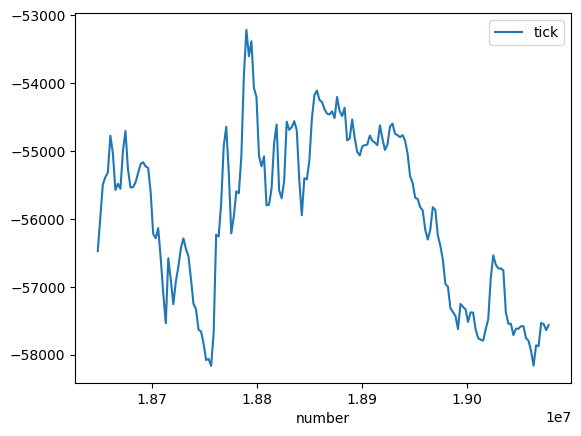

In [33]:
df.plot(x='number', y='tick')

In [34]:
# theta = fee volume per second per unit of external virtual liquidity
df['theta0'] = (df['price'] * df['feeGrowthGlobal0X128'].astype('float').diff() / df['number'].astype('float').diff()) / ((1 << 32) * df['sqrtPriceX96'].astype('float'))
df['theta1'] = (df['feeGrowthGlobal1X128'].astype('float').diff() / df['number'].astype('float').diff()) / ((1 << 32) * df['sqrtPriceX96'].astype('float'))
df['theta'] = (df['theta0'] + df['theta1']) / 2  # avg

In [35]:
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,...,position_tick_lower,position_tick_upper,position_amount0,position_amount1,position_fees0_cumulative,position_fees1_cumulative,price,theta0,theta1,theta
0,18648491,28354382561812163492150,99999999999999999999,0,0,4705106806636024133107504816,-56477,134277252253244812363549,2440808540949895184331901495783384173933,4345393370145094858923975689647192844,...,-887200,887200,28354382561812163492150,100000000000000000000,0,0,0.003527,NaN,NaN,NaN
1,18650891,27670565217772438242634,102471280722522134856,0,24962431540627625,4821383204122497016787556541,-55989,158701016739052850747715,2440808540949895184331901495783384173933,4350437848170358471472936883142681353,...,-887200,887200,28354382561812163492150,100000000000000000000,0,0,0.003703,0.000000e+00,1.015017e-07,5.075087e-08
2,18653291,26997878838467532133771,105024482595320921667,455810514909846581,52486804659631896,4941514079226711177658045696,-55496,109796199940500032224973,2440900652414373496200872860962647482514,4356000050519596543804946890812405822,...,-887200,887200,28354382561812163492150,100000000000000000000,0,0,0.003890,7.034666e-09,1.091982e-07,5.811645e-08
3,18655691,26852022055098777304429,105594962284890986531,455810514909846581,58249225766400228,4968355757931148360213776974,-55388,86961756806748576574666,2440900652414373496200872860962647482514,4357164536703488436236153854820895020,...,-887200,887200,28354382561812163492150,100000000000000000000,0,0,0.003932,0.000000e+00,2.273791e-08,1.136896e-08
4,18658091,26767352767363960669172,105988932295361729270,2626689024126404896,13929959922502268,4985481753149497923361074352,-55319,86807854606468260537735,2441431310925843818006174433134711381552,4359978745667480575457377519003776651,...,-887200,887200,26859620225218596831232,105624841915020529472,455810514909846581,58249225766400228,0.003960,4.088764e-08,5.476185e-08,4.782474e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,19068491,31308849430426114842655,96005630414510364943,846434933259157217,2041850665764615,4387270193532932702887942157,-57876,38348067475754676311775,2604120497129279324670704375002272055984,4962479131308402555588855977272113279,...,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565,0.003066,1.126459e-08,8.861679e-09,1.006313e-08
176,19070891,30778412307839242296558,97660197578010252848,9067598623284226854,44381938640120678,4462880688128718960411219507,-57534,40911903022619027717101,2605734078363979734907858742042485585507,4970789289578803946364576457224414436,...,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565,0.003173,1.112950e-07,1.806437e-07,1.459694e-07
177,19073291,30802619068573007843311,97583449655026160884,9312111357968727326,44381938640120678,4459373457631196217530670660,-57550,40911903022619027717101,2605782069278065400921455619092288402973,4970789289578803946364576457224414436,...,-887200,887200,31290898973164998492160,96060705373112882051,819114412417841049707,3094046544375690565,0.003168,3.307521e-09,0.000000e+00,1.653760e-09
178,19075691,30952318145281483276704,97184958431791125105,1394445421707485767,0,4439484254684374605495978218,-57639,40690843530060664250641,2606055655894774815831707066496962971602,4970789289578803946364576457224414436,...,-887200,887200,30814268048532442185728,97620353908098709536,828426523775809777033,3138428483015811243,0.003140,1.877142e-08,0.000000e+00,9.385709e-09


In [36]:
fit_start = 16741748
fit_end = 19162080
fit_step = 7200

In [37]:
FILEPATH_FIT = f"data/price_{pool_addr}_{fit_start}_{fit_end}_{fit_step}_params.csv"

In [38]:
df_fit = pd.read_csv(FILEPATH_FIT)
df_fit

,mu,sigma
0,4.367292e-07,0.000717


In [39]:
sigma = df_fit['sigma'].iloc[0]
sigma  # per block

0.0007169945537233

In [40]:
# roughly min fee volume per unit of external liquidity needed for opportunistic LP to be +EV
theta_min = sigma ** 2 / 8
theta_min

6.426014875860927e-08

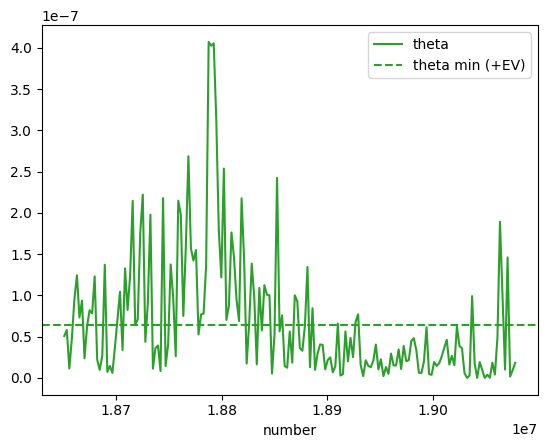

In [41]:
ax = df.plot(x='number', y='theta', color='C2')
ax.axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax.legend(loc='upper right')

In [42]:
# since compounding fees into principal each rebalance, only look at principal timeseries in units of token1
df['v-inf'] = (df['values0'].astype('float')) * df['price'] + df['values1'].astype('float')
df['y-inf'] = df['v-inf'] / df['v-inf'].iloc[0] - 1  # yield vs initial principal
df['i-inf'] = df['v-inf'] / (df['position_amount0'].astype('float').iloc[0] * df['price'] + df['position_amount1'].astype('float').iloc[0]) - 1  # yield vs initial passive hold
df['k-inf'] = df['v-inf'] / df['v-inf'] - 1  # yield vs full tick range lp

In [43]:
# accumulated fees and rate of return on them vs original principal value
df['f-inf'] = (df['position_fees0_cumulative'].astype('float')) * df['price'] + df['position_fees1_cumulative'].astype('float')
df['r-inf'] = df['f-inf'] / df['v-inf'].iloc[0]

In [44]:
# store the tick width for the strat
df['tick_width-inf'] = df['position_tick_upper'] - df['position_tick_lower']

In [45]:
df

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,...,theta0,theta1,theta,v-inf,y-inf,i-inf,k-inf,f-inf,r-inf,tick_width-inf
0,18648491,28354382561812163492150,99999999999999999999,0,0,4705106806636024133107504816,-56477,134277252253244812363549,2440808540949895184331901495783384173933,4345393370145094858923975689647192844,...,NaN,NaN,NaN,2.000000e+20,0.000000,0.000000,0.0,0.000000e+00,0.000000,1774400
1,18650891,27670565217772438242634,102471280722522134856,0,24962431540627625,4821383204122497016787556541,-55989,158701016739052850747715,2440808540949895184331901495783384173933,4350437848170358471472936883142681353,...,0.000000e+00,1.015017e-07,5.075087e-08,2.049426e+20,0.024713,-0.000298,0.0,0.000000e+00,0.000000,1774400
2,18653291,26997878838467532133771,105024482595320921667,455810514909846581,52486804659631896,4941514079226711177658045696,-55496,109796199940500032224973,2440900652414373496200872860962647482514,4356000050519596543804946890812405822,...,7.034666e-09,1.091982e-07,5.811645e-08,2.100490e+20,0.050245,-0.001200,0.0,0.000000e+00,0.000000,1774400
3,18655691,26852022055098777304429,105594962284890986531,455810514909846581,58249225766400228,4968355757931148360213776974,-55388,86961756806748576574666,2440900652414373496200872860962647482514,4357164536703488436236153854820895020,...,0.000000e+00,2.273791e-08,1.136896e-08,2.111899e+20,0.055950,-0.001480,0.0,0.000000e+00,0.000000,1774400
4,18658091,26767352767363960669172,105988932295361729270,2626689024126404896,13929959922502268,4985481753149497923361074352,-55319,86807854606468260537735,2441431310925843818006174433134711381552,4359978745667480575457377519003776651,...,4.088764e-08,5.476185e-08,4.782474e-08,2.119779e+20,0.059889,-0.001390,0.0,6.005407e+16,0.000300,1774400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,19068491,31308849430426114842655,96005630414510364943,846434933259157217,2041850665764615,4387270193532932702887942157,-57876,38348067475754676311775,2604120497129279324670704375002272055984,4962479131308402555588855977272113279,...,1.126459e-08,8.861679e-09,1.006313e-08,1.920113e+20,-0.039944,0.027095,0.0,5.605784e+18,0.028029,1774400
176,19070891,30778412307839242296558,97660197578010252848,9067598623284226854,44381938640120678,4462880688128718960411219507,-57534,40911903022619027717101,2605734078363979734907858742042485585507,4970789289578803946364576457224414436,...,1.112950e-07,1.806437e-07,1.459694e-07,1.953204e+20,-0.023398,0.028171,0.0,5.693104e+18,0.028466,1774400
177,19073291,30802619068573007843311,97583449655026160884,9312111357968727326,44381938640120678,4459373457631196217530670660,-57550,40911903022619027717101,2605782069278065400921455619092288402973,4970789289578803946364576457224414436,...,3.307521e-09,0.000000e+00,1.653760e-09,1.951669e+20,-0.024166,0.028128,0.0,5.689021e+18,0.028445,1774400
178,19075691,30952318145281483276704,97184958431791125105,1394445421707485767,0,4439484254684374605495978218,-57639,40690843530060664250641,2606055655894774815831707066496962971602,4970789289578803946364576457224414436,...,1.877142e-08,0.000000e+00,9.385709e-09,1.943699e+20,-0.028150,0.028261,0.0,5.739545e+18,0.028698,1774400


<Axes: xlabel='number'>

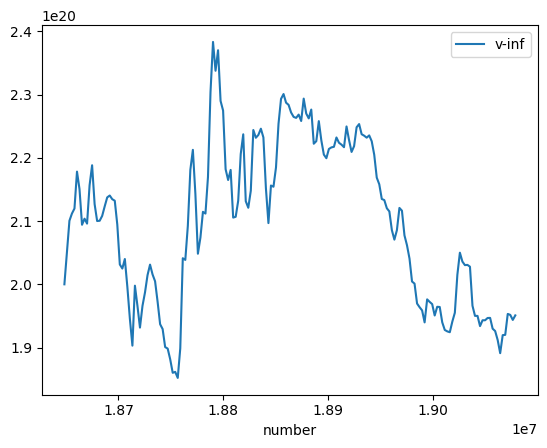

In [46]:
# value in units of token1 over time
df.plot(x='number', y='v-inf')

<Axes: xlabel='number'>

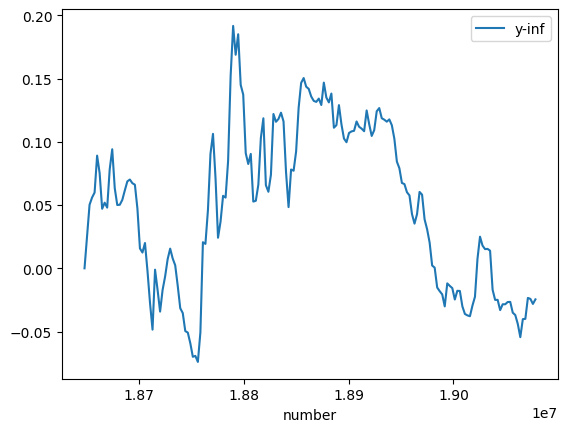

In [47]:
# yield in units of token1 over time relative to initial principal
df.plot(x='number', y='y-inf')

<Axes: xlabel='number'>

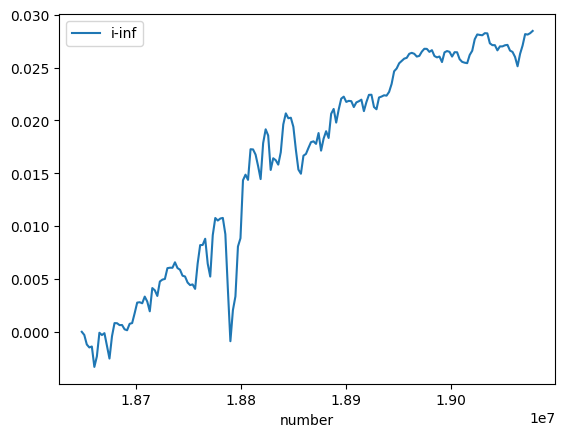

In [48]:
# yield in units of token1 over time relative to passive hold
df.plot(x='number', y='i-inf')

<Axes: xlabel='number'>

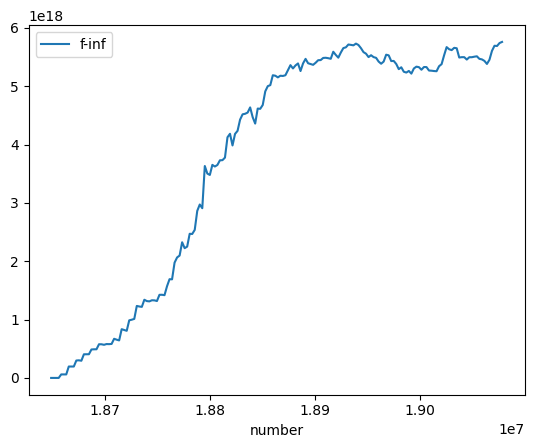

In [49]:
# accumulated fees in units of token1 over time
df.plot(x='number', y='f-inf')

<Axes: xlabel='number'>

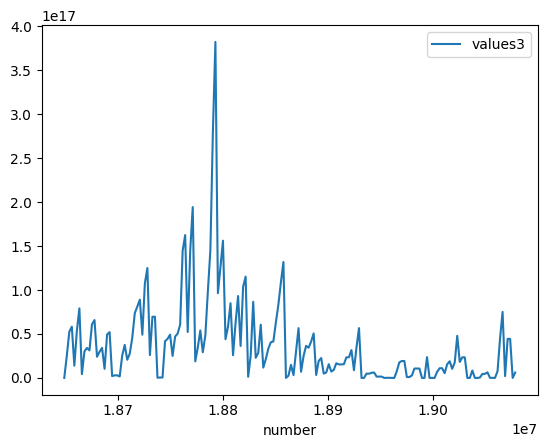

In [50]:
# fees in units of token1 over time
df.plot(x='number', y='values3')

<Axes: xlabel='number'>

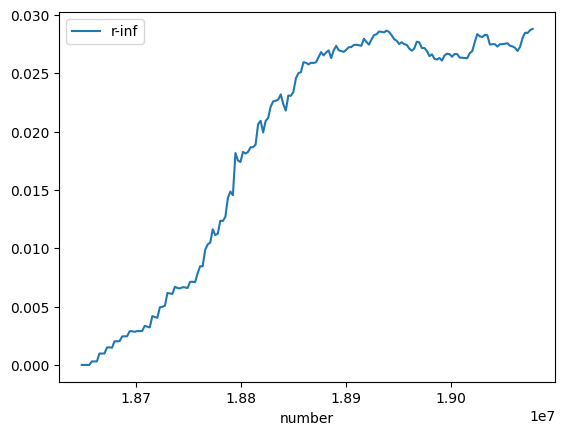

In [51]:
# fee return in units of token1 over time
df.plot(x='number', y='r-inf')

In [52]:
df.columns

Index(['number', 'values0', 'values1', 'values2', 'values3', 'sqrtPriceX96',
       'tick', 'liquidity', 'feeGrowthGlobal0X128', 'feeGrowthGlobal1X128',
       'position_token_id', 'position_liquidity', 'position_tick_lower',
       'position_tick_upper', 'position_amount0', 'position_amount1',
       'position_fees0_cumulative', 'position_fees1_cumulative', 'price',
       'theta0', 'theta1', 'theta', 'v-inf', 'y-inf', 'i-inf', 'k-inf',
       'f-inf', 'r-inf', 'tick_width-inf'],
      dtype='object')

In [53]:
# drop columns that are tick width dependent to build df across each backtest file
df.drop(columns=[f'values{i}' for i in range(4)], inplace=True)

In [54]:
df.drop(columns=[
    'position_token_id',
    'position_liquidity',
    'position_tick_lower',
    'position_tick_upper',
    'position_amount0',
    'position_amount1',
    'position_fees0_cumulative',
    'position_fees1_cumulative'
], inplace=True)

In [55]:
df

,number,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,price,theta0,theta1,theta,v-inf,y-inf,i-inf,k-inf,f-inf,r-inf,tick_width-inf
0,18648491,4705106806636024133107504816,-56477,134277252253244812363549,2440808540949895184331901495783384173933,4345393370145094858923975689647192844,0.003527,NaN,NaN,NaN,2.000000e+20,0.000000,0.000000,0.0,0.000000e+00,0.000000,1774400
1,18650891,4821383204122497016787556541,-55989,158701016739052850747715,2440808540949895184331901495783384173933,4350437848170358471472936883142681353,0.003703,0.000000e+00,1.015017e-07,5.075087e-08,2.049426e+20,0.024713,-0.000298,0.0,0.000000e+00,0.000000,1774400
2,18653291,4941514079226711177658045696,-55496,109796199940500032224973,2440900652414373496200872860962647482514,4356000050519596543804946890812405822,0.003890,7.034666e-09,1.091982e-07,5.811645e-08,2.100490e+20,0.050245,-0.001200,0.0,0.000000e+00,0.000000,1774400
3,18655691,4968355757931148360213776974,-55388,86961756806748576574666,2440900652414373496200872860962647482514,4357164536703488436236153854820895020,0.003932,0.000000e+00,2.273791e-08,1.136896e-08,2.111899e+20,0.055950,-0.001480,0.0,0.000000e+00,0.000000,1774400
4,18658091,4985481753149497923361074352,-55319,86807854606468260537735,2441431310925843818006174433134711381552,4359978745667480575457377519003776651,0.003960,4.088764e-08,5.476185e-08,4.782474e-08,2.119779e+20,0.059889,-0.001390,0.0,6.005407e+16,0.000300,1774400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,19068491,4387270193532932702887942157,-57876,38348067475754676311775,2604120497129279324670704375002272055984,4962479131308402555588855977272113279,0.003066,1.126459e-08,8.861679e-09,1.006313e-08,1.920113e+20,-0.039944,0.027095,0.0,5.605784e+18,0.028029,1774400
176,19070891,4462880688128718960411219507,-57534,40911903022619027717101,2605734078363979734907858742042485585507,4970789289578803946364576457224414436,0.003173,1.112950e-07,1.806437e-07,1.459694e-07,1.953204e+20,-0.023398,0.028171,0.0,5.693104e+18,0.028466,1774400
177,19073291,4459373457631196217530670660,-57550,40911903022619027717101,2605782069278065400921455619092288402973,4970789289578803946364576457224414436,0.003168,3.307521e-09,0.000000e+00,1.653760e-09,1.951669e+20,-0.024166,0.028128,0.0,5.689021e+18,0.028445,1774400
178,19075691,4439484254684374605495978218,-57639,40690843530060664250641,2606055655894774815831707066496962971602,4970789289578803946364576457224414436,0.003140,1.877142e-08,0.000000e+00,9.385709e-09,1.943699e+20,-0.028150,0.028261,0.0,5.739545e+18,0.028698,1774400


In [56]:
# calculate principal, fees, yield and fee return timeseries for each index in files array
for tick_width, fp in FILEPATHS.items():
    ticker = str(tick_width)
    if tick_width == 0:
        continue
    elif tick_width == -1:
        ticker = "opp"

    _df = pd.read_csv(fp)

    # value (v), yield vs initial principal (y), yield vs passive hold (i) , yield vs full tick range (k)
    df[f'v-{ticker}'] = (_df['values0'].astype('float')) * df['price'] + _df['values1'].astype('float')
    df[f'y-{ticker}'] = df[f'v-{ticker}'] / df[f'v-{ticker}'].iloc[0] - 1  # yield vs initial principal
    df[f'i-{ticker}'] = df[f'v-{ticker}'] / (_df['position_amount0'].astype('float').iloc[0] * df['price'] + _df['position_amount1'].astype('float').iloc[0]) - 1  # yield vs initial passive hold
    df[f'k-{ticker}'] = df[f'v-{ticker}'] / df['v-inf'] - 1  # yield vs full tick range LP

    # cumulative fees (f), return from fees vs initial principal (r)
    df[f'f-{ticker}'] = (_df['position_fees0_cumulative'].astype('float')) * df['price'] + _df['position_fees1_cumulative'].astype('float')
    df[f'r-{ticker}'] = df[f'f-{ticker}'] / df[f'v-{ticker}'].iloc[0]

    # store the tick width
    df[f'tick_width-{ticker}'] = _df['position_tick_upper'] - _df['position_tick_lower']

In [57]:
df

,number,sqrtPriceX96,tick,liquidity,feeGrowthGlobal0X128,feeGrowthGlobal1X128,price,theta0,theta1,theta,...,f-8400,r-8400,tick_width-8400,v-opp,y-opp,i-opp,k-opp,f-opp,r-opp,tick_width-opp
0,18648491,4705106806636024133107504816,-56477,134277252253244812363549,2440808540949895184331901495783384173933,4345393370145094858923975689647192844,0.003527,NaN,NaN,NaN,...,0.000000e+00,0.000000,10400,2.000000e+20,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1774400
1,18650891,4821383204122497016787556541,-55989,158701016739052850747715,2440808540949895184331901495783384173933,4350437848170358471472936883142681353,0.003703,0.000000e+00,1.015017e-07,5.075087e-08,...,0.000000e+00,0.000000,10400,2.049426e+20,0.024713,-0.000298,0.000000,0.000000e+00,0.000000,1774400
2,18653291,4941514079226711177658045696,-55496,109796199940500032224973,2440900652414373496200872860962647482514,4356000050519596543804946890812405822,0.003890,7.034666e-09,1.091982e-07,5.811645e-08,...,0.000000e+00,0.000000,10400,2.100490e+20,0.050245,-0.001200,0.000000,0.000000e+00,0.000000,1774400
3,18655691,4968355757931148360213776974,-55388,86961756806748576574666,2440900652414373496200872860962647482514,4357164536703488436236153854820895020,0.003932,0.000000e+00,2.273791e-08,1.136896e-08,...,0.000000e+00,0.000000,10400,2.111899e+20,0.055950,-0.001480,0.000000,0.000000e+00,0.000000,1774400
4,18658091,4985481753149497923361074352,-55319,86807854606468260537735,2441431310925843818006174433134711381552,4359978745667480575457377519003776651,0.003960,4.088764e-08,5.476185e-08,4.782474e-08,...,2.657448e+17,0.001312,8400,2.119779e+20,0.059889,-0.001390,0.000000,6.005407e+16,0.000300,1774400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,19068491,4387270193532932702887942157,-57876,38348067475754676311775,2604120497129279324670704375002272055984,4962479131308402555588855977272113279,0.003066,1.126459e-08,8.861679e-09,1.006313e-08,...,2.265984e+19,0.111840,8400,1.650627e+20,-0.174686,-0.117057,-0.140349,1.470010e+19,0.073500,1774400
176,19070891,4462880688128718960411219507,-57534,40911903022619027717101,2605734078363979734907858742042485585507,4970789289578803946364576457224414436,0.003173,1.112950e-07,1.806437e-07,1.459694e-07,...,2.301125e+19,0.113574,8400,1.679074e+20,-0.160463,-0.116131,-0.140349,1.493182e+19,0.074659,1774400
177,19073291,4459373457631196217530670660,-57550,40911903022619027717101,2605782069278065400921455619092288402973,4970789289578803946364576457224414436,0.003168,3.307521e-09,0.000000e+00,1.653760e-09,...,2.299482e+19,0.113493,8400,1.677755e+20,-0.161123,-0.116168,-0.140349,1.492098e+19,0.074605,1774400
178,19075691,4439484254684374605495978218,-57639,40690843530060664250641,2606055655894774815831707066496962971602,4970789289578803946364576457224414436,0.003140,1.877142e-08,0.000000e+00,9.385709e-09,...,2.313508e+19,0.114185,8400,1.670904e+20,-0.164548,-0.116054,-0.140349,1.492298e+19,0.074615,1774400


In [58]:
df.columns

Index(['number', 'sqrtPriceX96', 'tick', 'liquidity', 'feeGrowthGlobal0X128',
       'feeGrowthGlobal1X128', 'price', 'theta0', 'theta1', 'theta', 'v-inf',
       'y-inf', 'i-inf', 'k-inf', 'f-inf', 'r-inf', 'tick_width-inf', 'v-2800',
       'y-2800', 'i-2800', 'k-2800', 'f-2800', 'r-2800', 'tick_width-2800',
       'v-5600', 'y-5600', 'i-5600', 'k-5600', 'f-5600', 'r-5600',
       'tick_width-5600', 'v-8400', 'y-8400', 'i-8400', 'k-8400', 'f-8400',
       'r-8400', 'tick_width-8400', 'v-opp', 'y-opp', 'i-opp', 'k-opp',
       'f-opp', 'r-opp', 'tick_width-opp'],
      dtype='object')

In [59]:
tick_widths = list(FILEPATHS.keys())
tick_widths

[2800, 5600, 8400, 0, -1]

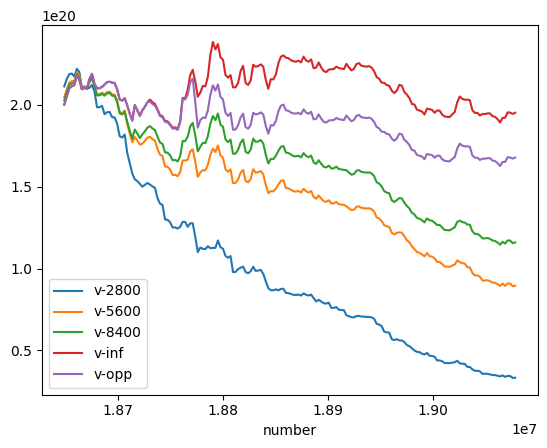

In [62]:
# values in units of token1 over time
ax = df.plot(x='number', y=[f'v-{tick_width}' if tick_width > 0 else ('v-inf' if tick_width == 0 else 'v-opp') for tick_width in tick_widths])
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_values_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

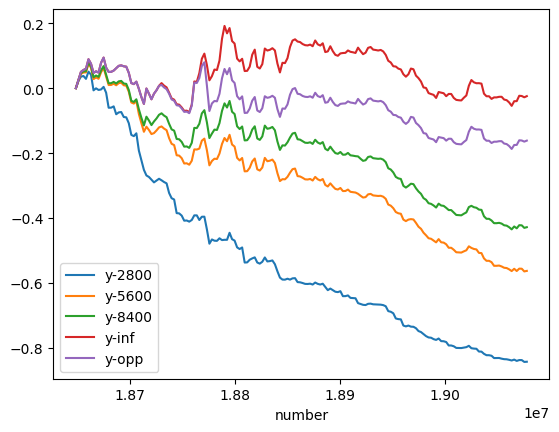

In [63]:
# yields in units of token1 over time
ax = df.plot(x='number', y=[f'y-{tick_width}' if tick_width > 0 else ('y-inf' if tick_width == 0 else 'y-opp')  for tick_width in tick_widths])
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_values_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

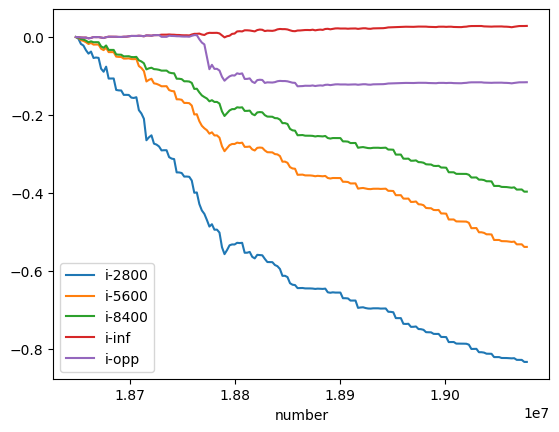

In [64]:
# yields in units of token1 over time relative to passive hold
ax = df.plot(x='number', y=[f'i-{tick_width}' if tick_width > 0 else ('i-inf' if tick_width == 0 else 'i-opp')  for tick_width in tick_widths])
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_yields_v_hold_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

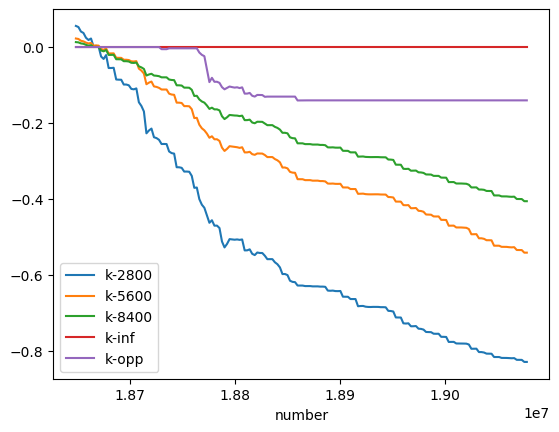

In [65]:
# yields in units of token1 over time relative to full tick range LP
ax = df.plot(x='number', y=[f'k-{tick_width}' if tick_width > 0 else ('k-inf' if tick_width == 0 else 'k-opp') for tick_width in tick_widths])
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_yields_v_full_range_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

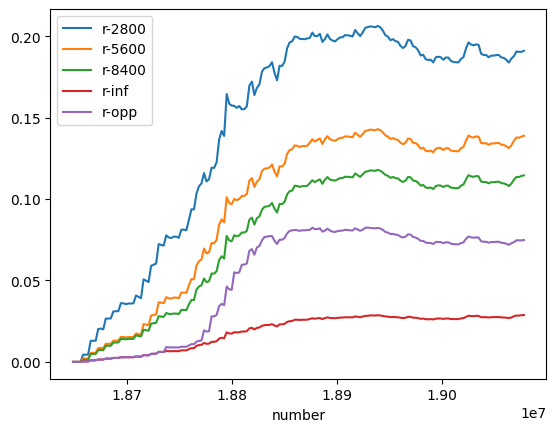

In [66]:
# fee returns in units of token1 over time
ax = df.plot(x='number', y=[f'r-{tick_width}' if tick_width > 0 else ('r-inf' if tick_width == 0 else 'r-opp')  for tick_width in tick_widths])
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_fee_returns_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

<Axes: xlabel='number'>

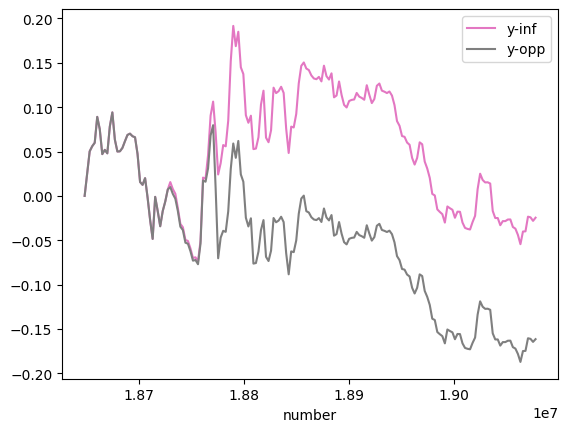

In [67]:
# focus on only opportunistic vs passive v2
df.plot(x='number', y=['y-inf', 'y-opp'], color=['C6', 'C7'])

<Axes: xlabel='number'>

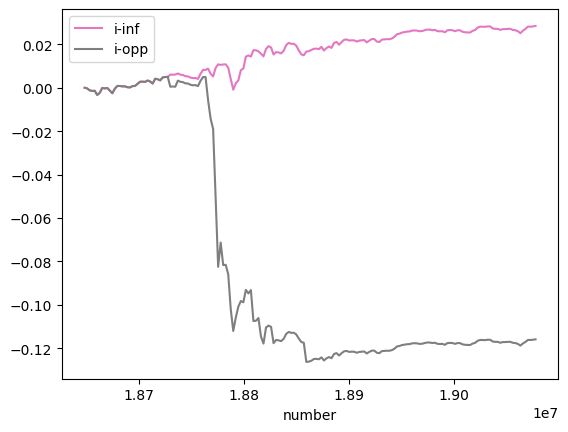

In [68]:
df.plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'])

<Axes: xlabel='number'>

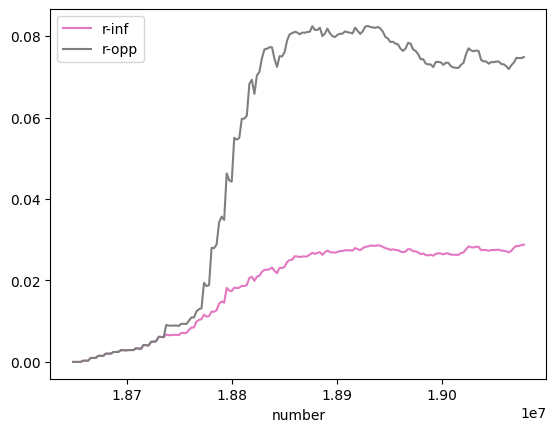

In [69]:
df.plot(x='number', y=['r-inf', 'r-opp'], color=['C6', 'C7'])

In [70]:
df['d(k-opp)'] = df['k-opp'].diff()

<Axes: xlabel='number'>

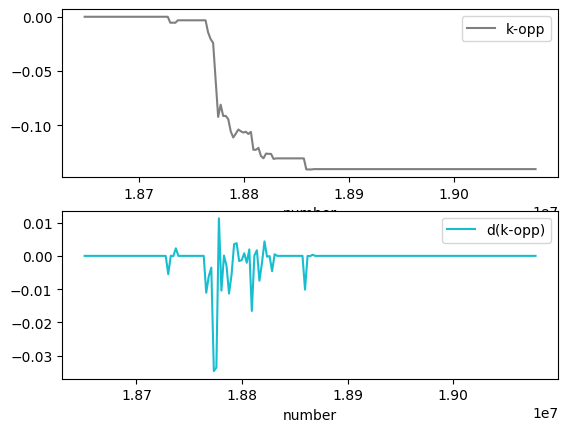

In [71]:
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y='k-opp', color='C7', ax=ax[0])
df.plot(x='number', y='d(k-opp)', color='C9', ax=ax[1])

In [72]:
# plot tick change over time to graph side by side with opportunistic yield. magnitude of jumps as well where IL hits hardest
# further, mark places on yield plots where opportunistic LP chooses tick width < full range (~theta > theta_min)

In [73]:
# go back and look at log prices
df['dprice'] = df['price'] / df['price'].iloc[0] - 1
df['dprice']

0      0.000000
1      0.050036
2      0.103014
3      0.115030
4      0.122730
         ...   
175   -0.130540
176   -0.100313
177   -0.101726
178   -0.109721
179   -0.103128
Name: dprice, Length: 180, dtype: float64

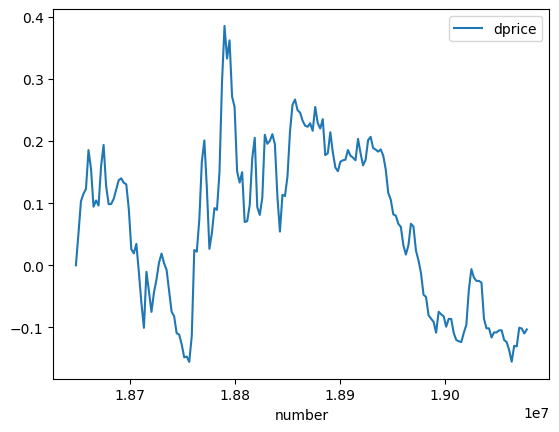

In [74]:
ax = df.plot(x='number', y='dprice')
ax.get_figure().savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_dprice_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

In [75]:
df['dlog(price)'] = df['tick'].diff() * np.log(1.0001)
df['dlog(price)']

0           NaN
1      0.048798
2      0.049298
3      0.010799
4      0.006900
         ...   
175   -0.001200
176    0.034198
177   -0.001600
178   -0.008900
179    0.007400
Name: dlog(price), Length: 180, dtype: float64

<Axes: xlabel='number'>

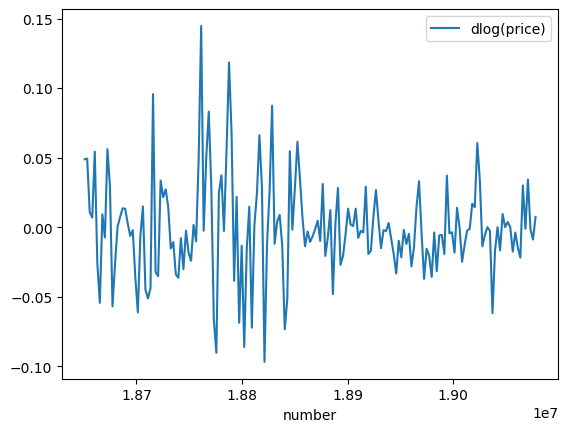

In [76]:
df.plot(x='number', y='dlog(price)')

In [77]:
# calculate per candle sigma to see magnitude of largest tick move
blocks_per_candle = df['number'].diff().iloc[-1]
blocks_per_candle

2400.0

In [78]:
sigma_per_candle = sigma * (blocks_per_candle) ** (1/2)
sigma_per_candle

0.035125416099532514

In [79]:
# max tick change per candle on chart
np.abs(df['dlog(price)']).max()

0.14469276548228122

In [80]:
# > 4 sigma move
np.abs(df['dlog(price)']).max() / sigma_per_candle

4.119318190346133

In [81]:
# probability of this occuring in log-normal world is roughly (ignoring drift) ...
#  ... log(p_{t+dt}/p_t) = sigma_per_candle * W_1
#  ...  => P[log(p_{t+dt}/p_t) > z_{alpha}] = 1 - Phi(z_{\alpha}/sigma_per_candle)
1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle)

1.8999755654447448e-05

In [83]:
# ~1 in 100K chance for 2400 blocks per candle
# implies only happens in log normal world every ~ 126 million blocks
int(blocks_per_candle / (1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle)))

126317413

In [84]:
# or in years ... once every 48 years in log-normal world
SECONDS_PER_BLOCK = 12
(int(blocks_per_candle / (1 - norm.cdf(np.abs(df['dlog(price)']).max() / sigma_per_candle))) * SECONDS_PER_BLOCK) // (365.25 * 86400)

48.0

In [55]:
# suggests LP losing money on this large jump due our model's naive reliance on GBM
# and GBM's inability to capture tail behavior (i.e. discontinuous jumps in stochastic process)
# as had one > 4 sigma and one > 3.3 sigma moves within backtest span of ~ 2 months

In [85]:
np.abs(df['dlog(price)']).sort_values(ascending=False)

47     0.144693
58     0.118394
72     0.096895
28     0.095695
53     0.090295
         ...   
169    0.000100
167    0.000000
164    0.000000
160    0.000000
0           NaN
Name: dlog(price), Length: 180, dtype: float64

In [87]:
np.abs(df['dlog(price)']).sort_values(ascending=False).iloc[1] / sigma_per_candle

3.370610046558274

In [89]:
# order of mag less
1 - norm.cdf(np.abs(df['dlog(price)']).sort_values(ascending=False).iloc[1] / sigma_per_candle)

0.00037500971526571725

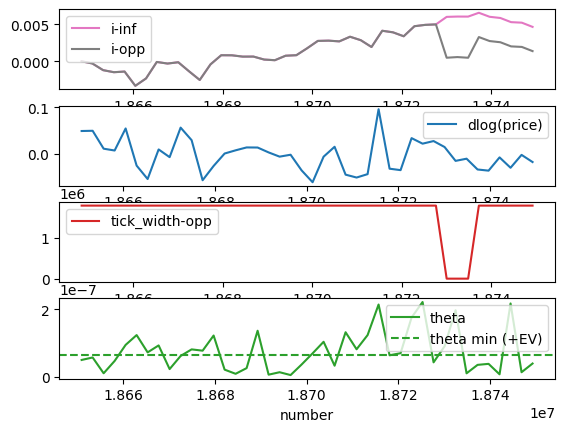

In [100]:
# plot comparison of backtests relative to passive hold before the largest move to see performance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] < 1.875e7].plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='upper left')

df[df['number'] < 1.875e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] < 1.875e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] < 1.875e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

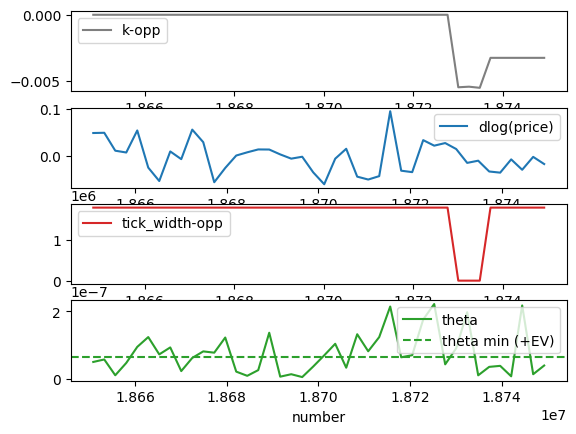

In [99]:
# plot comparison of backtests relative to full range before the largest move to see performance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] < 1.875e7].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper left')

df[df['number'] < 1.875e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] < 1.875e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] < 1.875e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

In [95]:
# look at when price jumps happened exactly ..
df[(df['number'] > 1.875e7) & (df['number'] < 1.88e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'k-opp', 'd(k-opp)'])

,number,dlog(price),tick_width-opp,k-opp,d(k-opp)
43,18751691,-0.024199,1774400,-0.003270,1.317835e-12
44,18754091,0.001600,1774400,-0.003270,0.000000e+00
45,18756491,-0.010299,1774400,-0.003270,-2.220446e-16
46,18758891,0.048598,1774400,-0.003270,5.186962e-13
47,18761291,0.144693,1774400,-0.003270,0.000000e+00
48,18763691,-0.002600,1774400,-0.003270,0.000000e+00
49,18766091,0.049698,10000,-0.014354,-1.108465e-02
50,18768491,0.083096,10000,-0.020505,-6.150473e-03
51,18770891,0.028699,10000,-0.024034,-3.529080e-03
52,18773291,-0.066697,2800,-0.058663,-3.462894e-02


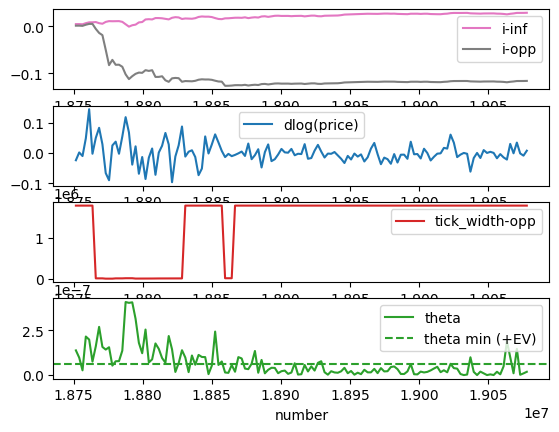

In [101]:
# plot comparison of backtests relative to passive hold after the largest move to see underperformance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] > 1.875e7].plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[df['number'] > 1.875e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] > 1.875e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] > 1.875e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

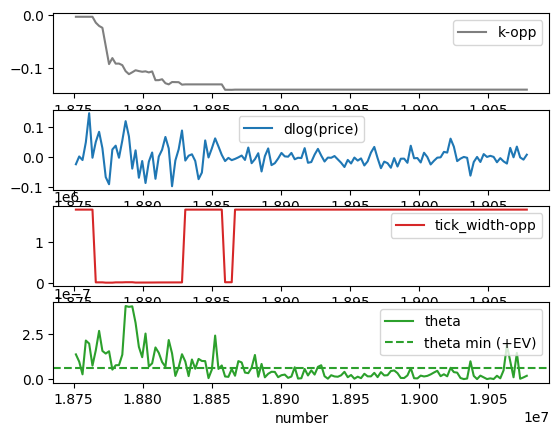

In [102]:
# plot comparison of backtests relative to full range after the largest move to see underperformance of opportunistic strategy
fig, ax = plt.subplots(4, 1)
df[df['number'] > 1.875e7].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[df['number'] > 1.875e7].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[df['number'] > 1.875e7].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[df['number'] > 1.875e7].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

In [103]:
df['P[dlog(price) > z]'] = 1 - norm.cdf(np.abs(df['dlog(price)']) / sigma_per_candle)
df['P[dlog(price) > z]']

0           NaN
1      0.082380
2      0.080238
3      0.379249
4      0.422137
         ...   
175    0.486374
176    0.165126
177    0.481835
178    0.399993
179    0.416575
Name: P[dlog(price) > z], Length: 180, dtype: float64

In [104]:
# Does tick width adjust happen after large log price change? It does.
# However, there are several other 2+ sigma events (P ~ 1% chance) within the 7 day period after largest move.
df[(df['number'] > 1.875e7) & (df['number'] < 1.88e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'k-opp', 'd(k-opp)'])

,number,dlog(price),P[dlog(price) > z],tick_width-opp,k-opp,d(k-opp)
43,18751691,-0.024199,0.245435,1774400,-0.003270,1.317835e-12
44,18754091,0.001600,0.481835,1774400,-0.003270,0.000000e+00
45,18756491,-0.010299,0.384677,1774400,-0.003270,-2.220446e-16
46,18758891,0.048598,0.083249,1774400,-0.003270,5.186962e-13
47,18761291,0.144693,0.000019,1774400,-0.003270,0.000000e+00
48,18763691,-0.002600,0.470499,1774400,-0.003270,0.000000e+00
49,18766091,0.049698,0.078555,10000,-0.014354,-1.108465e-02
50,18768491,0.083096,0.008998,10000,-0.020505,-6.150473e-03
51,18770891,0.028699,0.206955,10000,-0.024034,-3.529080e-03
52,18773291,-0.066697,0.028794,2800,-0.058663,-3.462894e-02


In [105]:
#  ... the most significant negative changes to opportunistic yield relative to full range LPing happen after each of these extreme events
#  ... gives credibility to argument that LP opportunitistic strategy is underperforming due to mismodelled price behavior (i.e. no tails modelled)
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'k-opp', 'd(k-opp)']).sort_values(by='d(k-opp)')

,number,dlog(price),P[dlog(price) > z],tick_width-opp,k-opp,d(k-opp)
52,18773291,-0.066697,0.028794,2800,-0.058663,-3.462894e-02
53,18775691,-0.090295,0.005075,2800,-0.092256,-3.359298e-02
67,18809291,-0.072296,0.019784,7600,-0.122594,-1.655198e-02
58,18787691,0.118394,0.000375,13200,-0.105593,-1.131154e-02
49,18766091,0.049698,0.078555,10000,-0.014354,-1.108465e-02
55,18780491,0.037298,0.144151,9600,-0.091420,-1.044049e-02
70,18816491,0.066097,0.029936,8800,-0.128271,-7.468827e-03
50,18768491,0.083096,0.008998,10000,-0.020505,-6.150473e-03
59,18790091,0.067797,0.026795,13200,-0.111220,-5.627021e-03
75,18828491,0.087396,0.006421,8800,-0.130951,-4.608211e-03


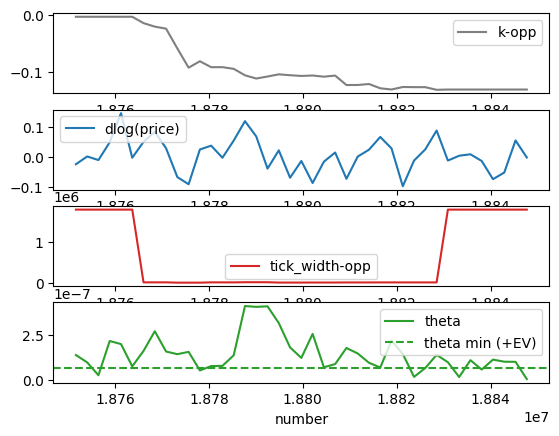

In [106]:
# plot comparison of backtests relative to full range after the largest move to see underperformance of opportunistic strategy
# constrained to 1 week period after price event
#  ... inherent time lag in theta assessment used to determine opp optimal tick delta def an issu
fig, ax = plt.subplots(4, 1)
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_yields_v_full_range_after_jump_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

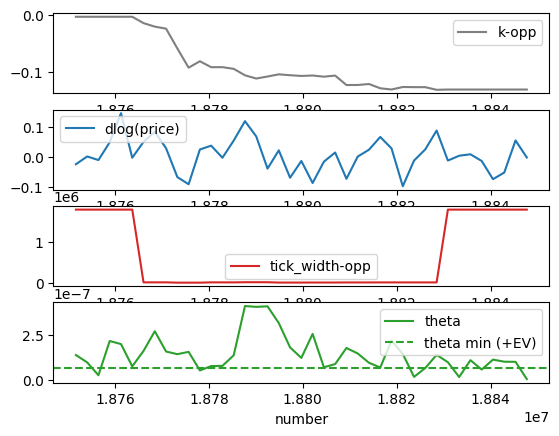

In [107]:
# look at other opportunistic liquidity provision after this initial jump to see how strat did
fig, ax = plt.subplots(4, 1)
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='upper right')

df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

In [108]:
df[(df['number'] > 1.875e7) & (df['number'] < 1.885e7)].filter(items=['number', 'dlog(price)', 'P[dlog(price) > z]', 'tick_width-opp', 'k-opp', 'd(k-opp)'])

,number,dlog(price),P[dlog(price) > z],tick_width-opp,k-opp,d(k-opp)
43,18751691,-0.024199,0.245435,1774400,-0.003270,1.317835e-12
44,18754091,0.001600,0.481835,1774400,-0.003270,0.000000e+00
45,18756491,-0.010299,0.384677,1774400,-0.003270,-2.220446e-16
46,18758891,0.048598,0.083249,1774400,-0.003270,5.186962e-13
47,18761291,0.144693,0.000019,1774400,-0.003270,0.000000e+00
48,18763691,-0.002600,0.470499,1774400,-0.003270,0.000000e+00
49,18766091,0.049698,0.078555,10000,-0.014354,-1.108465e-02
50,18768491,0.083096,0.008998,10000,-0.020505,-6.150473e-03
51,18770891,0.028699,0.206955,10000,-0.024034,-3.529080e-03
52,18773291,-0.066697,0.028794,2800,-0.058663,-3.462894e-02


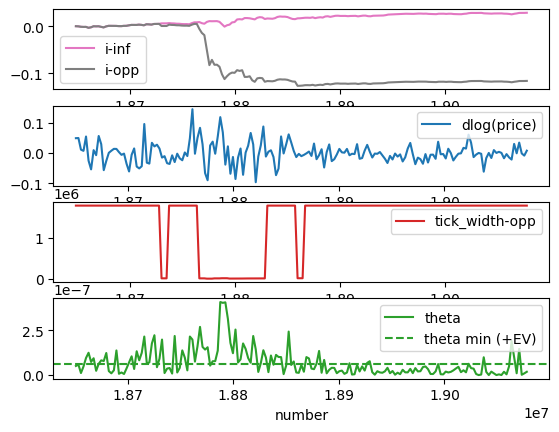

In [109]:
# side by side over full timespan for yield vs passive hold ...
fig, ax = plt.subplots(4, 1)

df.plot(x='number', y=['i-inf', 'i-opp'], color=['C6', 'C7'], ax=ax[0])
ax[0].legend(loc='lower left')

df.plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df.plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df.plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_yields_v_hold_over_full_timespan_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

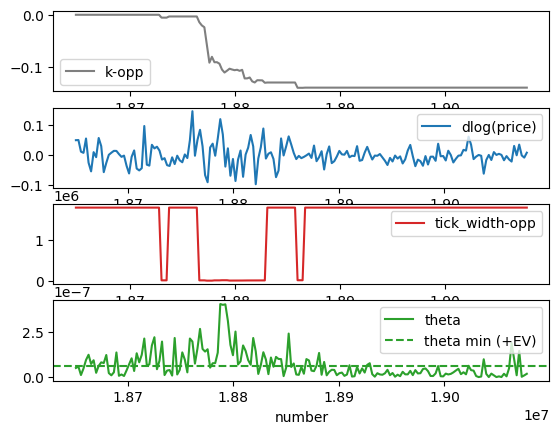

In [110]:
# side by side over full timespan for opp yield vs full range LP ...
fig, ax = plt.subplots(4, 1)

df.plot(x='number', y=['k-opp'], color=['C7'], ax=ax[0])
ax[0].legend(loc='lower left')

df.plot(x='number', y='dlog(price)', color='C0', ax=ax[1])
df.plot(x='number', y='tick_width-opp', color='C3', ax=ax[2])

df.plot(x='number', y='theta', color='C2', ax=ax[3])
ax[3].axhline(theta_min, color='C2', linestyle='--', label='theta min (+EV)')
ax[3].legend(loc='upper right')

fig.savefig(f'results/backtest/UniswapV3LPSimpleRunner_{pool_addr}_yield_v_full_range_over_full_timespan_{blocks_between_rebalance}_{start}_{stop}_{step}.png')

In [111]:
df['k-opp']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
175   -0.140349
176   -0.140349
177   -0.140349
178   -0.140349
179   -0.140349
Name: k-opp, Length: 180, dtype: float64